# ISLR Chapter 6

## Exercise 2

**For parts (a) through (c), indicate which of i. through iv. is correct. Justify your answer.**

**2. a) The Lasso, relative to least squares, is:**

   **i) More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.**
   
   **ii) More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.**
   
   **iii) Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.**
   
   **iv) Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.**

**Answer:** iii) relative to least squares, the Lasso is less flexible and hence it will give us better predictions when its increase in bias is less than its decrease in variance (page 223).

**2. b) Repeat (a) for ridge regression relative to least squares.**

**Answer:** iii) same as in Lasso (page 217).

**2. c) Repeat (a) for non-linear methods relative to least squares.**

**Answer:** ii) relative to least squares, non-linear methods are tipically more flexible and hence, these methods will give us better predictions when the increase in variance is less than the decrease in bias.

## Exercise 4

**Suppose we estimate the regression coefficients in a linear regression model by minimizing:**

$\sum^n_{i=1} (y_i - \beta_0 - \sum^p_{j=1} \beta_j x_{i,j})^2 + \lambda \sum^p_{j=1} \beta_j^2$

**for a particular value of $\lambda$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.**

**4. a) As we increase $\lambda$ from 0, the training RSS will:**

   **i. Increase initially, and then eventually start decreasing in an inverted U shape.**
   
   **ii. Decrease initially, and then eventually start increasing in a U shape.**
   
   **iii. Steadily increase.**
   
   **iv. Steadily decrease.**
   
   **v. Remain constant.**

**Answer:** iii. Steadily increase. 

As we increase $\lambda$ from 0, all $\beta$ 's decrease from their least square estimate values to 0. Training error for full-blown-OLS $\beta$ 's is the minimum and it steadily increases as $\beta$ 's are reduced to 0.

**4. b) Repeat (a) for test RSS.**

**Answer:** ii. Decrease initially, and then eventually start increasing in a U shape. 

When  $\lambda =0$, all $\beta$ 's have their least square estimate values. In this case, the model tries to fit hard to training data and hence test RSS is high. As we increase  $\lambda$, $\beta$ 's start reducing to zero and some of the overfitting is reduced. Thus, test RSS initially decreases. Eventually, as $\beta$ 's approach 0, the model becomes too simple and test RSS increases.

**4. c) Repeat (a) for variance.**

**Answer:** iv. Steadily decrease.

When $\lambda =0$, the $\beta$ 's have their least square estimate values. The actual estimates heavily depend on the training data and hence variance is high. As we increase $\lambda$, $\beta$ 's start decreasing and model becomes simpler. In the limiting case of $\lambda$ approaching infinity, all $\beta$ 's reduce to zero and model predicts a constant and has no variance.

**4. d) Repeat (a) for (squared) bias.**

**Answer:** iii. Steadily increase.

When $\lambda =0$, the $\beta$ 's have their least-square estimate values and hence have the least bias. As $\lambda$ increases, $\beta$ 's start reducing towards zero, the model fits less accurately to training data and hence bias increases. In the limiting case of $\lambda$ approaching infinity, the model predicts a constant and hence bias is maximum.

**4. e) Repeat (a) for the irreducible error.**

**Answer:** v. Remain constant.

By definition, irreducible error is model independent and hence irrespective of the choice of $\lambda$, it remains constant.

## Exercise 8

**In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.**

#### 8. a) Use the rnorm() function to generate a predictor $X$ of length $n = 100$, as well as a noise vector $\epsilon$ of length $n = 100$.

In [3]:
# set seed for rnorm function
set.seed(10)

# rnorm simulates random variates having a specified normal distribution, here the standard one
X = rnorm(100)
eps = rnorm(100)

#### 8. b) Generate a response vector $Y$ of length $n = 100$ according to the model:

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

**where $\beta_0, \beta_1, \beta_2, \beta_3$ are constants of your choice.**

In [4]:
#select betas
beta0 = 2
beta1 = 2
beta2 = -2
beta3 = 4

#write down the model to obtain the response vector Y
Y = beta0 + beta1 * X + beta2 * X^2 + beta3 * X^3 + eps

#### 8. c) Use the regsubsets() function to perform best subset selection in order to choose the best model containing the predictors $X, X^2, ..., X^{10}$. What is the best model obtained according to Cp, BIC, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the data.frame() function to create a single data set containing both $X$ and $Y$.

[1] 3

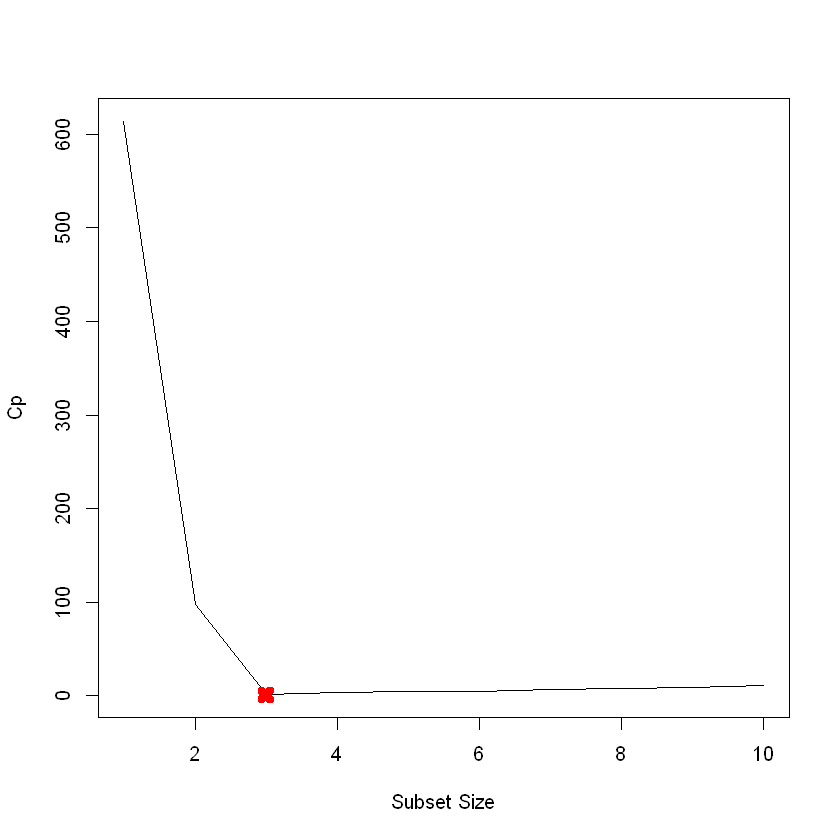

In [10]:
#Install package leaps if needed
#install.packages("leaps")
options(warn=-1)

#call the leaps package
library(leaps)

#use data.frame() function to create single dataset of X and Y
data.full = data.frame(y = Y, x = X)

#Use the regsubsets() function to perform best subset selection
mod.full = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10)

#store results "printed" when using summary function
mod.summary = summary(mod.full)

# Plot and find the model size for best:
# cp
which.min(mod.summary$cp)

plot(mod.summary$cp, xlab = "Subset Size", ylab = "Cp", pch = 20, type = "l")
points(which.min(mod.summary$cp), mod.summary$cp[3], pch = 4, col = "red", lwd = 7)

[1] 3

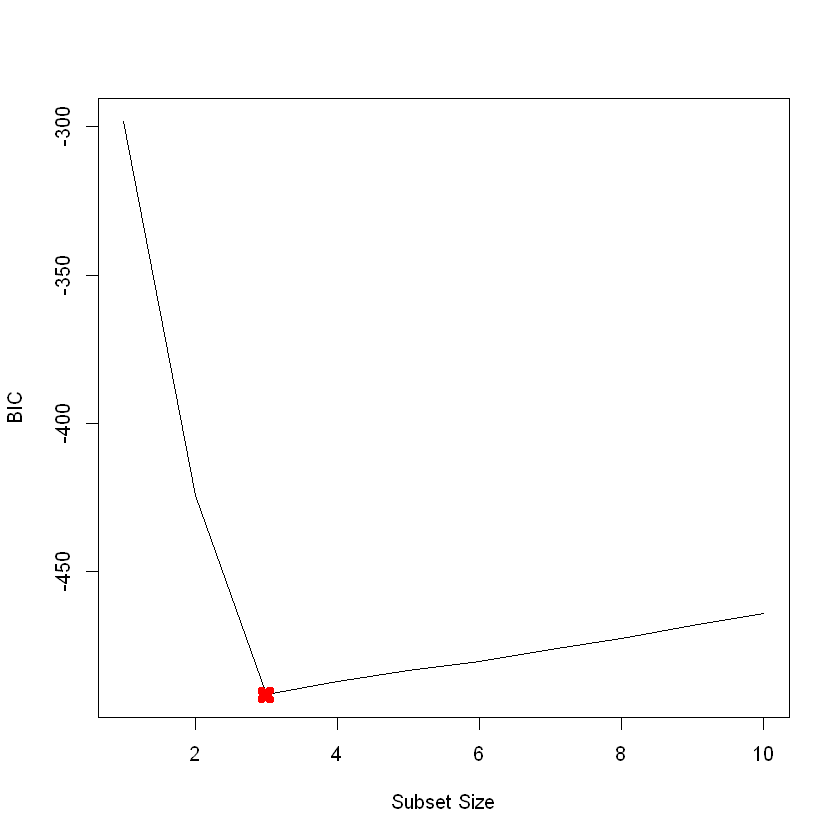

In [11]:
# BIC
which.min(mod.summary$bic)

plot(mod.summary$bic, xlab = "Subset Size", ylab = "BIC", pch = 20, type = "l")
points(which.min(mod.summary$bic), mod.summary$bic[3], pch = 4, col = "red", lwd = 7)

[1] 3

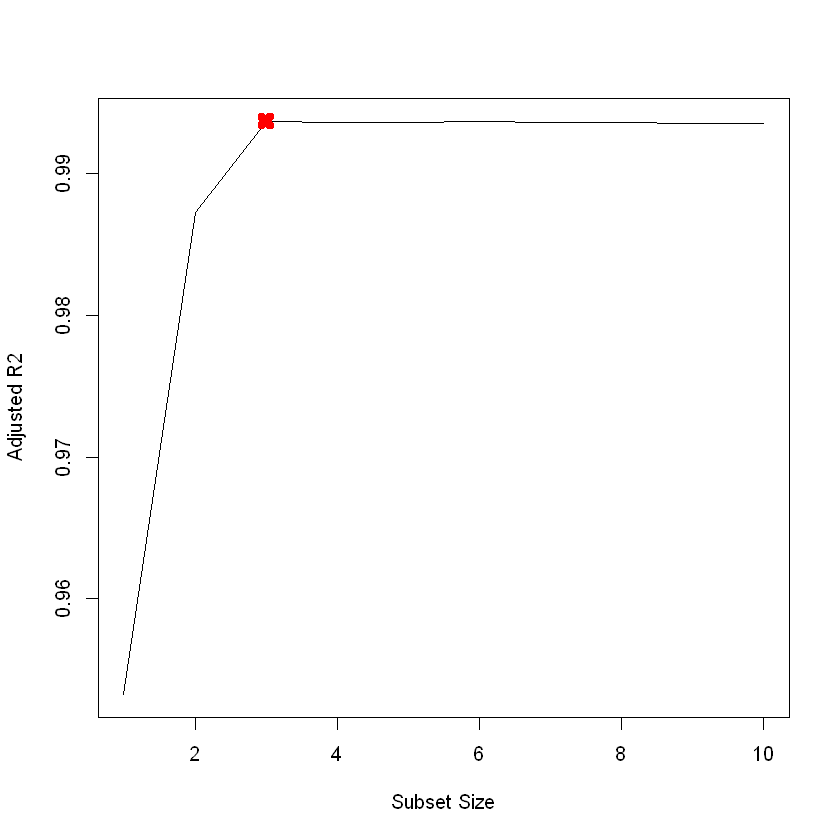

In [12]:
# adjr2
which.max(mod.summary$adjr2)

plot(mod.summary$adjr2, xlab = "Subset Size", ylab = "Adjusted R2", pch = 20, type = "l")
points(which.max(mod.summary$adjr2), mod.summary$adjr2[3], pch = 4, col = "red", lwd = 7)

**Answer:** We find that with Cp, BIC and Adjusted R2 criteria, 3, 3, and 3 variable models are respectively picked.

In [13]:
 round(coefficients(mod.full, id = 3), digits=2)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
                 1.93                  1.88                 -2.04 
poly(x, 10, raw = T)3 
                 4.02

**Answer:** As expected, all the coefficients are quite close to our chosen $\beta$ 's.

#### 8. d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

In [14]:
#Use the regsubsets() function to perform best subset selection (look at chosen method!)
mod.fwd = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10, 
    method = "forward")
mod.bwd = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10, 
    method = "backward")

#store results
fwd.summary = summary(mod.fwd)
bwd.summary = summary(mod.bwd)

# Find the model size for best:
# cp forward
which.min(fwd.summary$cp)

# cp backward
which.min(bwd.summary$cp)

# BIC
which.min(fwd.summary$bic)
which.min(bwd.summary$bic)

# adjr2
which.max(fwd.summary$adjr2)
which.max(bwd.summary$adjr2)

[1] 3

[1] 5

[1] 3

[1] 5

[1] 3

[1] 5

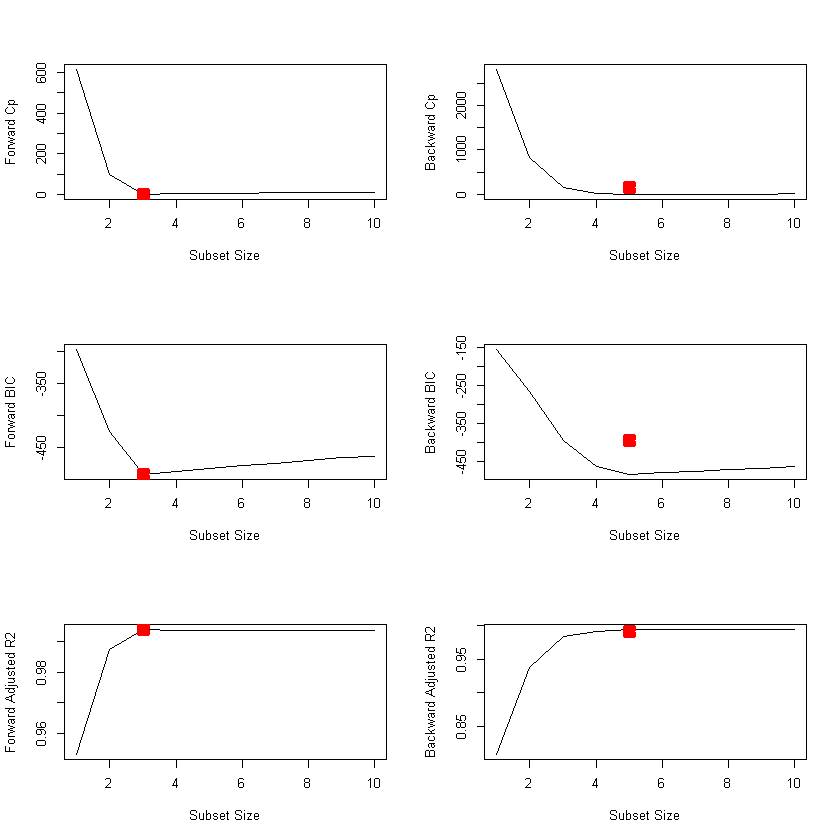

In [16]:
# Plot the statistics
par(mfrow = c(3, 2))
#cp
plot(fwd.summary$cp, xlab = "Subset Size", ylab = "Forward Cp", pch = 20, type = "l")
points(which.min(fwd.summary$cp), fwd.summary$cp[3], pch = 4, col = "red", lwd = 7)
plot(bwd.summary$cp, xlab = "Subset Size", ylab = "Backward Cp", pch = 20, type = "l")
points(which.min(bwd.summary$cp), bwd.summary$cp[3], pch = 4, col = "red", lwd = 7)

#BIC
plot(fwd.summary$bic, xlab = "Subset Size", ylab = "Forward BIC", pch = 20, type = "l")
points(which.min(fwd.summary$bic), fwd.summary$bic[3], pch = 4, col = "red", lwd = 7)
plot(bwd.summary$bic, xlab = "Subset Size", ylab = "Backward BIC", pch = 20, type = "l")
points(which.min(bwd.summary$bic), bwd.summary$bic[3], pch = 4, col = "red", lwd = 7)

#adjr2
plot(fwd.summary$adjr2, xlab = "Subset Size", ylab = "Forward Adjusted R2", pch = 20, type = "l")
points(which.max(fwd.summary$adjr2), fwd.summary$adjr2[3], pch = 4, col = "red", lwd = 7)
plot(bwd.summary$adjr2, xlab = "Subset Size", ylab = "Backward Adjusted R2", pch = 20, type = "l")
points(which.max(bwd.summary$adjr2), bwd.summary$adjr2[4], pch = 4, col = "red", lwd = 7)

**Answer:** We see that while all backward stepwise with cp, BIC and adjusted $R^2$ pick 5 variable models, the forward stepwise with cp, BIC and adjusted $R^2$ pick only 3 variable models. Here are the coefficients:

In [17]:
 round(coefficients(mod.fwd, id = 3), digits=2)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
                 1.93                  1.88                 -2.04 
poly(x, 10, raw = T)3 
                 4.02

In [18]:
round(coefficients(mod.bwd, id = 5), digits=2)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
                 1.98                  3.14                 -2.08 
poly(x, 10, raw = T)5 poly(x, 10, raw = T)7 poly(x, 10, raw = T)9 
                 3.42                 -1.05                  0.11

**Answer:** Here, and as expected, all the coefficients for forward stepwise are quite close to our chosen $\beta$ 's. However, for the backward stepwise with 5 variable picks $X^5, X^7, X^9$ and drops $X^3$.

#### 8. e) Now fit a lasso model to the simulated data, again using $X, X^2, ..., X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.

[1] 0.05988275

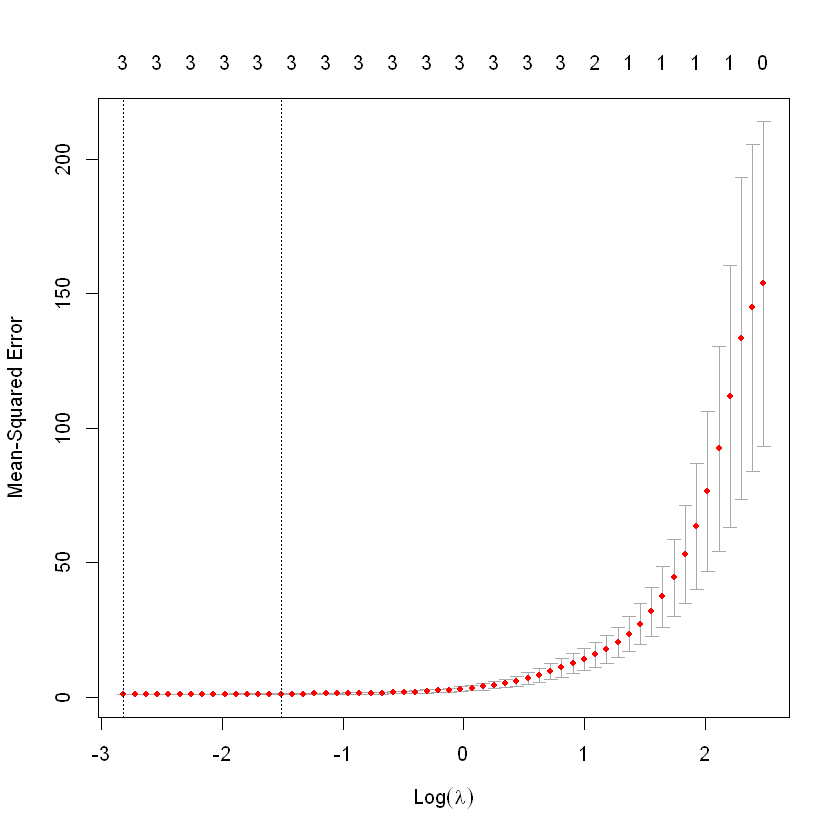

In [20]:
#Install package glmnet if needed
#install.packages("glmnet")
options(warn=-1)

#call the glmnet package
library(glmnet)

#set seed
set.seed(10)

#training Lasso on the data
xmat = model.matrix(y ~ poly(x, 10, raw = T), data = data.full)[, -1]

#Use cross-validation to select the optimal value of  lambda
mod.lasso = cv.glmnet(xmat, Y, alpha = 1)

#store and display lambda
best.lambda = mod.lasso$lambda.min
best.lambda

#plot
plot(mod.lasso)

In [21]:
# Next fit the model on entire data using best lambda
best.model = glmnet(xmat, Y, alpha = 1)
predict(best.model, s = best.lambda, type = "coefficients")

11 x 1 sparse Matrix of class "dgCMatrix"
                               1
(Intercept)             1.881373
poly(x, 10, raw = T)1   1.854449
poly(x, 10, raw = T)2  -1.991838
poly(x, 10, raw = T)3   4.010379
poly(x, 10, raw = T)4   .       
poly(x, 10, raw = T)5   .       
poly(x, 10, raw = T)6   .       
poly(x, 10, raw = T)7   .       
poly(x, 10, raw = T)8   .       
poly(x, 10, raw = T)9   .       
poly(x, 10, raw = T)10  .       

**Answer:** Lasso picks the correct specification.

#### 8. f) Now generate a response vector Y according to the model:

$Y = \beta_0 + \beta_7 X^7 + \epsilon$

**and perform best subset selection and the lasso. Discuss the results obtained.**

In [22]:
# create new beta 7
beta7 = 2

# model
Y = beta0 + beta7 * X^7 + eps

# Predict using regsubsets
data.full = data.frame(y = Y, x = X)
mod.full = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10)
mod.summary = summary(mod.full)

# Find the model size for best cp, BIC and adjr2
which.min(mod.summary$cp)
which.min(mod.summary$bic)
which.min(mod.summary$adjr2)

[1] 1

[1] 1

[1] 10

In [24]:
round(coefficients(mod.full, id = 1), digits=2)

(Intercept) poly(x, 10, raw = T)7 
                  1.9                   2.0

In [15]:
round(coefficients(mod.full, id = 10), digits=2)

(Intercept)  poly(x, 10, raw = T)1  poly(x, 10, raw = T)2 
                  1.98                   0.64                   0.45 
 poly(x, 10, raw = T)3  poly(x, 10, raw = T)4  poly(x, 10, raw = T)5 
                 -2.61                  -1.82                   2.33 
 poly(x, 10, raw = T)6  poly(x, 10, raw = T)7  poly(x, 10, raw = T)8 
                  1.47                   1.30                  -0.40 
 poly(x, 10, raw = T)9 poly(x, 10, raw = T)10 
                  0.07                   0.04

**Answer:** We see that both cp and BIC pick the most accurate 1-variable model with matching coefficients. Adjusted $R^2$ criteria picks 10(!) variables.

In [25]:
xmat = model.matrix(y ~ poly(x, 10, raw = T), data = data.full)[, -1]
mod.lasso = cv.glmnet(xmat, Y, alpha = 1)
best.lambda = mod.lasso$lambda.min
best.lambda

[1] 2.717423

In [26]:
best.model = glmnet(xmat, Y, alpha = 1)
predict(best.model, s = best.lambda, type = "coefficients")

11 x 1 sparse Matrix of class "dgCMatrix"
                              1
(Intercept)            1.783453
poly(x, 10, raw = T)1  .       
poly(x, 10, raw = T)2  .       
poly(x, 10, raw = T)3  .       
poly(x, 10, raw = T)4  .       
poly(x, 10, raw = T)5  .       
poly(x, 10, raw = T)6  .       
poly(x, 10, raw = T)7  1.941570
poly(x, 10, raw = T)8  .       
poly(x, 10, raw = T)9  .       
poly(x, 10, raw = T)10 .       

**Answer:** Lasso also picks the best 1-variable model with coefficients being quite close to our specification.

## Exercise 10
**We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.**

#### 10. a) Generate a data set with $p = 20$ features, $n = 1000$ observations, and an associated quantitative response vector generated according to the model:

$Y = X\beta + \epsilon$

**where $\beta$ has some elements that are exactly equal to zero.**

In [31]:
# set seed for rnorm function
set.seed(10)

# select number of features
p = 20

# select number of observations
n = 1000

# rnorm simulates random variates having a specified normal distribution, here the standard one
# x is a 1000x20 matrix
x = matrix(rnorm(n * p), n, p)
# B and eps are a 20x1 vector
B = rnorm(p)
eps = rnorm(p)

# set some elements of B equal to zero
B[3] = 0
B[4] = 0
B[9] = 0
B[10] = 0
B[19] = 0

# use %*% for matrix multiplication to obtain a 1000*1 vector
# if we use * instead we obtain a 1000*20 vector. why? This operation
# does a simple element by element multiplication up to matrices.
y = x %*% B + eps

#### 10 .b) Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [33]:
# set seed
set.seed(10)

# sample function takes a sample of the specified size (100) 
# from the elements of 1, 2, ..., 1000, without replacement
train   = sample(seq(1000), 100, replace = FALSE)

# use the previously defined train vector to indicate which
# data subset is the training and the testing one
y.train = y[train, ]
y.test  = y[-train, ]
x.train = x[train, ]
x.test  = x[-train, ]

#### 10. c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

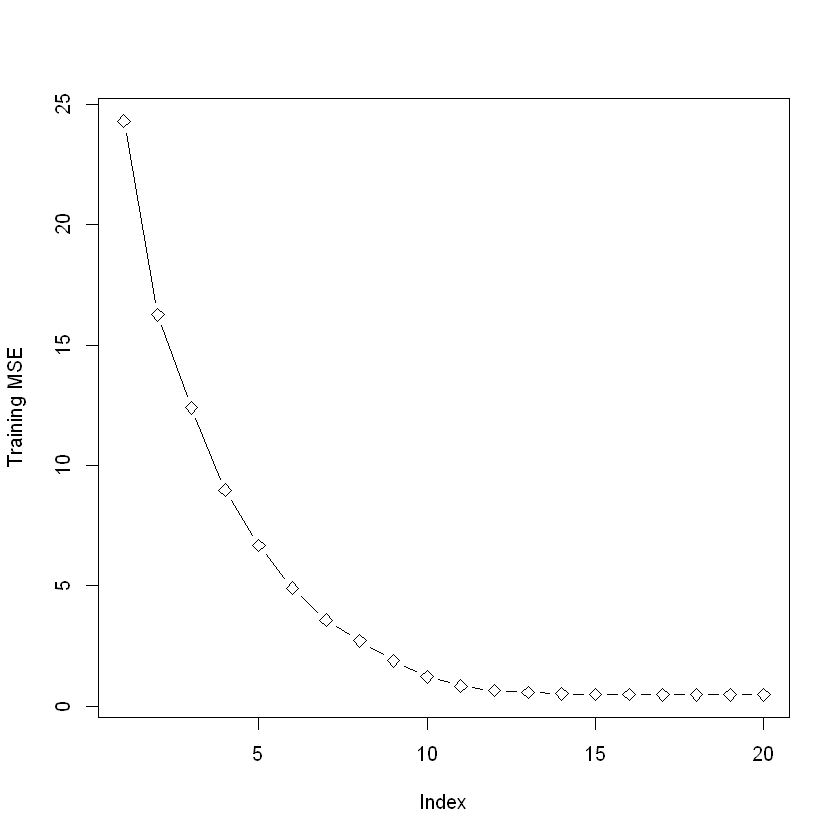

In [34]:
# set seed
set.seed(10)

# call leaps package
library(leaps)

# nvmax - maximum size of subsets to examine
regfit.full = regsubsets(y ~ ., data = data.frame(x = x.train, y = y.train), nvmax = p)

# create storage vector
val.errors = rep(NA, p)

# store column names
x_cols = colnames(x, do.NULL = FALSE, prefix = "x.")

# loop over each subset p
for (i in 1:p) {
    # store coefficients
    coefi = coef(regfit.full, id = i)
    # make prediction using training subset
    pred = as.matrix(x.train[, x_cols %in% names(coefi)]) %*% coefi[names(coefi) %in% x_cols]
    # store MSE of the training subset
    val.errors[i] = mean((y.train - pred)^2)
}

#plot
plot(val.errors, ylab = "Training MSE", pch = 5, type = "b")

#### 10. d) Plot the test set MSE associated with the best model of each size.

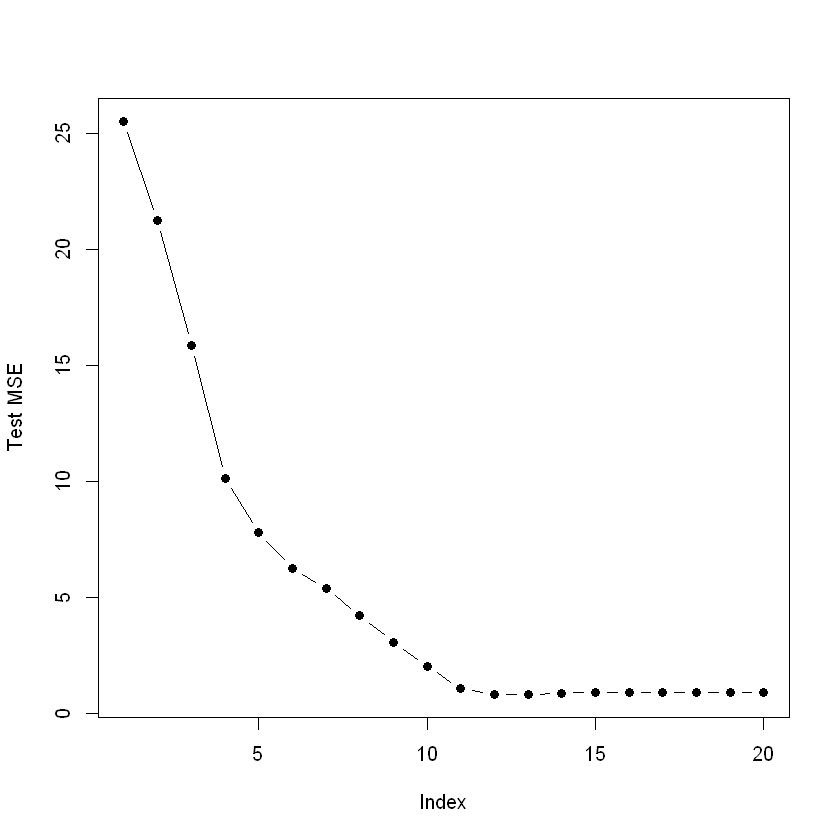

In [35]:
# create storage vector
val.errors = rep(NA, p)

# loop over each subset p
for (i in 1:p) {
    # store coefficients
    coefi = coef(regfit.full, id = i)
    # make prediction using testing subset
    pred = as.matrix(x.test[, x_cols %in% names(coefi)]) %*% coefi[names(coefi) %in% x_cols]
    # store MSE of the testing subset
    val.errors[i] = mean((y.test - pred)^2)
}

# plot
plot(val.errors, ylab = "Test MSE", pch = 19, type = "b")

#### 10. e) For which model size does the test set MSE take on its minimum value? Comment on your results.

In [22]:
which.min(val.errors)

[1] 13

**Answer:** A 13 parameter model has the smallest test MSE.

#### 10. f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [36]:
round(coef(regfit.full, id = which.min(val.errors)), digits=2)

(Intercept)         x.1         x.5         x.6         x.7         x.8 
       0.12        1.06       -1.10       -1.44        2.62       -2.12 
       x.11        x.12        x.13        x.14        x.15        x.16 
       2.22        1.06        2.13        1.30        1.13       -0.51 
       x.17        x.20 
       1.07        0.35

**Answer:** Caught all zeroed coefficients (3,4,9,10,19) and added other zeroed coefficients (2,18).

#### 10. g) Create a plot displaying $\sqrt{\sum_{j=1}^p (\beta_j - \hat{\beta}_j^r)^2}$ for a range of values of $r$, where $\hat{\beta}_j^r$ is the $j$th coefficient estimate for the best model containing $r$ coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

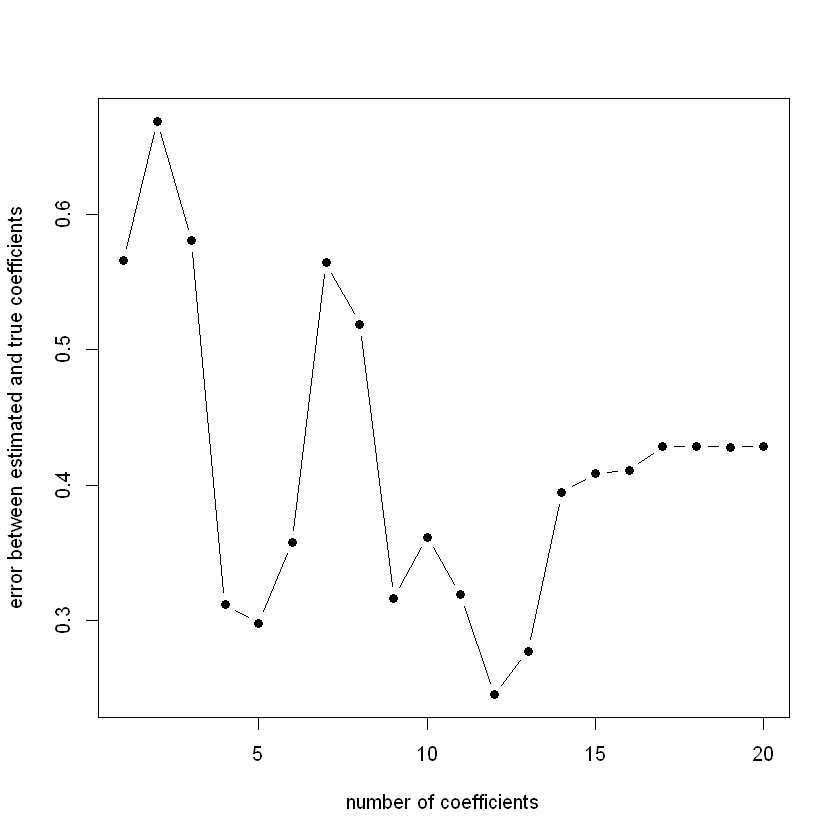

In [39]:
# create storage vectors
val.errors = rep(NA, p)
a = rep(NA, p)
b = rep(NA, p)

# loop over each subset p
for (i in 1:p) {
    # store coefficients
    coefi = coef(regfit.full, id = i)
    
    # store number of coefficients excluding the intercept
    a[i] = length(coefi) - 1
    
    # compute what is asked in the question   -   to be confirmed!!!
    b[i] = sqrt(sum((B[x_cols %in% names(coefi)] - coefi[names(coefi) %in% x_cols])^2) + 
        sum(B[!(x_cols %in% names(coefi))])^2)
}

# plot
plot(x = a, y = b, xlab = "number of coefficients", ylab = "error between estimated and true coefficients", pch = 19, type = "b")

In [40]:
which.min(b)

[1] 12

**Answer:** Test error is minimized with a 12 parameter model.